# Bonus question
Raj Patil  
CS18BTECH11039

In [7]:
from time import perf_counter as pc
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# nomenclature:

clg: clang related  
gcc: gcc related  
prp: preprocessing times  
prs: parsing times  
cg_ot: optimization times with code generation: using O2  
cg: code generation times with no optimization


#### NOT USING old files and beginning compilation again at all times

In [65]:
num_runs = range(50)

# Clang toolchain

In [64]:
#inbuilt analysis tools
!time clang++ -ftime-report test4.cpp 

===-------------------------------------------------------------------------===
                         Miscellaneous Ungrouped Timers
===-------------------------------------------------------------------------===

   ---User Time---   --System Time--   --User+System--   ---Wall Time---  --- Name ---
   0.0580 ( 68.2%)   0.0000 (  0.0%)   0.0580 ( 67.6%)   0.0580 ( 66.6%)  Code Generation Time
   0.0271 ( 31.8%)   0.0007 (100.0%)   0.0278 ( 32.4%)   0.0290 ( 33.4%)  LLVM IR Generation Time
   0.0851 (100.0%)   0.0007 (100.0%)   0.0858 (100.0%)   0.0871 (100.0%)  Total

===-------------------------------------------------------------------------===
                      Instruction Selection and Scheduling
===-------------------------------------------------------------------------===
  Total Execution Time: 0.0042 seconds (0.0042 wall clock)

   ---User Time---   --User+System--   ---Wall Time---  --- Name ---
   0.0009 ( 21.9%)   0.0009 ( 21.9%)   0.0009 ( 21.8%)  Instruction Select

In [66]:
clang = namedtuple('Clang','prp prs cg cg_ot')

In [67]:
# custom runs
clang_runs=[]
for i in num_runs:
    t0 = pc()
    !clang++  -E test4.cpp &>/dev/null
    t1=pc()-t0
    !clang++ -fsyntax-only test4.cpp &>/dev/null
    t2=pc()-(t0+t1)
    !clang++ -O0 -S test4.cpp &> /dev/null
    t3=pc()-(t0+t1+t2)
    !clang++ -O2 -S test4.cpp &>/dev/null
    t4=pc()-(t0+t1+t2+t3)
    clang_runs.append(clang(t1,t2,t3,t4))

In [68]:
np_clg = np.asarray(clang_runs)
np_clg.shape

(50, 4)

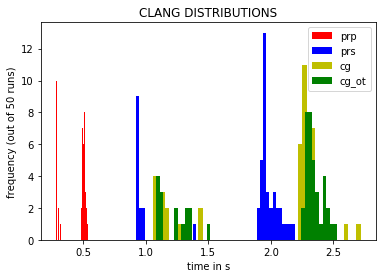

In [69]:
plt.hist(np_clg[:,0],bins=50,color='r',label="prp")
plt.hist(np_clg[:,1],bins=50,color='b',label="prs")
plt.hist(np_clg[:,2],bins=50,color='y',label="cg")
plt.hist(np_clg[:,3],bins=50,color='g',label="cg_ot")
plt.title("CLANG DISTRIBUTIONS")
plt.legend()
plt.xlabel("time in s")
plt.ylabel("frequency (out of " + str(len(num_runs)) + " runs)")
plt.show()

# GCC toolchain

In [60]:
# gcc inbuilt analysis
!time g++ -ftime-report test4.cpp 


Execution times (seconds)
 phase setup             :   0.00 ( 0%) usr   0.00 ( 0%) sys   0.00 ( 0%) wall    1495 kB ( 1%) ggc
 phase parsing           :   1.26 (85%) usr   0.54 (89%) sys   1.80 (86%) wall  135869 kB (82%) ggc
 phase lang. deferred    :   0.15 (10%) usr   0.02 ( 3%) sys   0.18 ( 9%) wall   18801 kB (11%) ggc
 phase opt and generate  :   0.07 ( 5%) usr   0.05 ( 8%) sys   0.11 ( 5%) wall    8608 kB ( 5%) ggc
 |name lookup            :   0.36 (24%) usr   0.08 (13%) sys   0.48 (23%) wall   10851 kB ( 7%) ggc
 |overload resolution    :   0.31 (21%) usr   0.01 ( 2%) sys   0.28 (13%) wall   29805 kB (18%) ggc
 dump files              :   0.01 ( 1%) usr   0.00 ( 0%) sys   0.00 ( 0%) wall       0 kB ( 0%) ggc
 callgraph construction  :   0.01 ( 1%) usr   0.01 ( 2%) sys   0.02 ( 1%) wall     801 kB ( 0%) ggc
 callgraph optimization  :   0.00 ( 0%) usr   0.00 ( 0%) sys   0.01 ( 0%) wall       4 kB ( 0%) ggc
 trivially dead code     :   0.00 ( 0%) usr   0.00 ( 0%) sys   0.01 ( 0%)

This, unlike clang, provides the complete time analysis and 

In [70]:
gcc = namedtuple('GCC','prp prs cg cg_ot')

In [71]:
# custom runs
gcc_runs=[]
for i in num_runs:
    t0 = pc()
    !g++  -E test4.cpp &>/dev/null
    t1=pc()-t0
    !g++ -fsyntax-only test4.cpp &>/dev/null
    t2=pc()-(t0+t1)
    !g++ -O0 -S test4.cpp &> /dev/null
    t3=pc()-(t0+t1+t2)
    !g++ -O2 -S test4.cpp &>/dev/null
    t4=pc()-(t0+t1+t2+t3)
    gcc_runs.append(gcc(t1,t2,t3,t4))

In [72]:
np_gcc = np.asarray(gcc_runs)
np_gcc.shape

(50, 4)

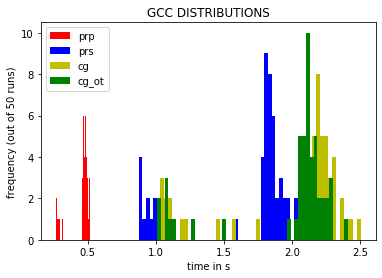

In [73]:
plt.hist(np_gcc[:,0],bins=50,color='r',label="prp")
plt.hist(np_gcc[:,1],bins=50,color='b',label="prs")
plt.hist(np_gcc[:,2],bins=50,color='y',label="cg")
plt.hist(np_gcc[:,3],bins=50,color='g',label="cg_ot")
plt.title("GCC DISTRIBUTIONS")
plt.legend()
plt.xlabel("time in s")
plt.ylabel("frequency (out of " + str(len(num_runs)) + " runs)")
plt.show()

# collecting means

In [82]:
print("\n","GCC")
print("gcc_prp",np_gcc[:,0].mean())
print("gcc_prs",np_gcc[:,1].mean())
print("gcc_cg",  np_gcc[:,2].mean())
print("gcc_cg_ot", np_gcc[:,3].mean())

print("\n","CLANG")
print("clg_prp" ,np_clg[:,0].mean())
print("clg_prs" , np_clg[:,1].mean())
print("clg_cg" , np_clg[:,2].mean())
print("clg_cg_ot" , np_clg[:,3].mean())



 GCC
gcc_prp 0.4530730939997011
gcc_prs 1.6781543300001067
gcc_cg 1.995258301999711
gcc_cg_ot 1.9667276100002347

 CLANG
clg_prp 0.4522343220002949
clg_prs 1.706136847999587
clg_cg 2.00593066399917
clg_cg_ot 2.011734538000019


That is very close

# Notes

- cg_ot is not very different from cg and is in fact lesser in the case of gcc which is not expected.
- inbuilt tools paint a different picture which is expected : the python interpreter adds its own delays into this
    - ftime-report shows clang to be a bit faster 
    - but the pythonic analysis doesn't show a significant difference 
- However, given the effect weared of due to python's delays, We have reason to believe that clang is faster.
- Also note that the histograms observed are bimodal due to the presence of a cache and hence we should only compare corresponding peaks.